<a href="https://colab.research.google.com/github/Ramit28/22BDS0268/blob/main/22BDS0268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA PROJECT 1 SLOT C2
# FACULTY- DR.PRAKASH M
# 22BDS0268
# RAMIT KHETARPAL

In [44]:
# --------------------------------------
# BCSE331L EDA Project - 22BDS0268
# Phase I: Exploratory Data Analysis
# --------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 1: Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/NaturalGas.csv"
df = pd.read_csv(url)

print("Dataset Dimensions:", df.shape)
print(df.head())

Dataset Dimensions: (138, 11)
   rownames state  statecode  year  consumption  price  eprice  oprice  \
0         1    NY         35  1967       313656   1.42    2.98    7.40   
1         2    NY         35  1968       319282   1.38    2.91    7.77   
2         3    NY         35  1969       331326   1.37    2.84    7.96   
3         4    NY         35  1970       346533   1.40    2.87    8.33   
4         5    NY         35  1971       352085   1.50    3.07    8.80   

   lprice  heating    income  
0    1.47     6262  10903.75  
1    1.42     6125  11370.02  
2    1.38     6040  11578.68  
3    1.37     6085  11586.77  
4    1.40     5907  11657.42  


In [45]:
print("\nData Types:\n", df.dtypes)


Data Types:
 rownames         int64
state           object
statecode        int64
year             int64
consumption      int64
price          float64
eprice         float64
oprice         float64
lprice         float64
heating          int64
income         float64
dtype: object


In [46]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    rownames state  statecode  year  consumption  price  eprice  oprice  \
0         1    NY         35  1967       313656   1.42    2.98    7.40   
1         2    NY         35  1968       319282   1.38    2.91    7.77   
2         3    NY         35  1969       331326   1.37    2.84    7.96   
3         4    NY         35  1970       346533   1.40    2.87    8.33   
4         5    NY         35  1971       352085   1.50    3.07    8.80   

   lprice  heating    income  
0    1.47     6262  10903.75  
1    1.42     6125  11370.02  
2    1.38     6040  11578.68  
3    1.37     6085  11586.77  
4    1.40     5907  11657.42  


In [47]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          rownames  statecode         year    consumption       price  \
count  138.000000  138.00000   138.000000     138.000000  138.000000   
mean    69.500000   27.00000  1978.000000  252901.478261    3.422319   
std     39.981246   15.68811     6.657415  184478.131559    2.169215   
min      1.000000    5.00000  1967.000000    9430.000000    0.680000   
25%     35.250000   10.00000  1972.000000   49103.500000    1.380000   
50%     69.500000   29.00000  1978.000000  300835.500000    2.775000   
75%    103.750000   44.00000  1984.000000  346428.750000    5.310000   
max    138.000000   45.00000  1989.000000  637289.000000    8.060000   

           eprice      oprice      lprice      heating        income  
count  138.000000  138.000000  138.000000   138.000000    138.000000  
mean     5.053551   24.635580    3.207681  4154.528986  11193.235652  
std      2.577859   15.401018    2.124937  2451.998462   1906.726093  
min      1.980000    5.010000    0.680000   4

In [48]:
if 'rownames' in df.columns:
    df.drop(columns=['rownames'], inplace=True)
    print("\n'Dropped column: rownames'")


'Dropped column: rownames'


In [49]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        statecode         year    consumption       price      eprice  \
count  138.00000   138.000000     138.000000  138.000000  138.000000   
mean    27.00000  1978.000000  252901.478261    3.422319    5.053551   
std     15.68811     6.657415  184478.131559    2.169215    2.577859   
min      5.00000  1967.000000    9430.000000    0.680000    1.980000   
25%     10.00000  1972.000000   49103.500000    1.380000    2.432500   
50%     29.00000  1978.000000  300835.500000    2.775000    4.520000   
75%     44.00000  1984.000000  346428.750000    5.310000    7.282500   
max     45.00000  1989.000000  637289.000000    8.060000   10.860000   

           oprice      lprice      heating        income  
count  138.000000  138.000000   138.000000    138.000000  
mean    24.635580    3.207681  4154.528986  11193.235652  
std     15.401018    2.124937  2451.998462   1906.726093  
min      5.010000    0.680000   481.000000   7465.340000  
25%      8.240000    1.257500  208

In [50]:
# Check for Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [51]:
# Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64


In [52]:
# Convert Short Forms into Full Forms
df['state'] = df['state'].str.strip().str.upper()
state_full_names = {
    "NY": "New York",
    "UT": "Utah",
    "MI": "Michigan",
    "CA": "California",
    "FL": "Florida",
    "TX": "Texas"
}
df['state'] = df['state'].replace(state_full_names)

# Step 3: Check if it worked
print(df[df['state'].isin(["New York", "Utah", "California", "Florida", "Texas"])].head())


      state  statecode  year  consumption  price  eprice  oprice  lprice  \
0  New York         35  1967       313656   1.42    2.98    7.40    1.47   
1  New York         35  1968       319282   1.38    2.91    7.77    1.42   
2  New York         35  1969       331326   1.37    2.84    7.96    1.38   
3  New York         35  1970       346533   1.40    2.87    8.33    1.37   
4  New York         35  1971       352085   1.50    3.07    8.80    1.40   

   heating    income  
0     6262  10903.75  
1     6125  11370.02  
2     6040  11578.68  
3     6085  11586.77  
4     5907  11657.42  


In [53]:
# Convert data types if needed
df['year'] = df['year'].astype(int)
print(df)

          state  statecode  year  consumption  price  eprice  oprice  lprice  \
0      New York         35  1967       313656   1.42    2.98    7.40    1.47   
1      New York         35  1968       319282   1.38    2.91    7.77    1.42   
2      New York         35  1969       331326   1.37    2.84    7.96    1.38   
3      New York         35  1970       346533   1.40    2.87    8.33    1.37   
4      New York         35  1971       352085   1.50    3.07    8.80    1.40   
..          ...        ...   ...          ...    ...     ...     ...     ...   
133  California          5  1985       527495   5.72    7.78   30.58    5.84   
134  California          5  1986       464307   5.14    7.95   44.15    5.72   
135  California          5  1987       503473   5.26    8.03   35.24    5.14   
136  California          5  1988       497138   5.64    8.69   34.02    5.26   
137  California          5  1989       514276   5.59    9.45   44.44    5.64   

     heating    income  
0       6262  

In [54]:
# OUTLIER DETECTION
selected_states = ["New York", "Utah", "California", "Florida", "Texas"]
df_filtered = df[df['state'].isin(selected_states)]
numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_filtered, col)
    outlier_summary[col] = outliers[[col, 'state', 'year']]

# Display results
for col, outliers in outlier_summary.items():
    print(f"\nOutliers in '{col}'")
    if outliers.empty:
        print("No outliers detected.")
    else:
        print(outliers)


Outliers in 'statecode'
No outliers detected.

Outliers in 'year'
No outliers detected.

Outliers in 'consumption'
No outliers detected.

Outliers in 'price'
No outliers detected.

Outliers in 'eprice'
No outliers detected.

Outliers in 'oprice'
No outliers detected.

Outliers in 'lprice'
No outliers detected.

Outliers in 'heating'
No outliers detected.

Outliers in 'income'
      income     state  year
22  16425.33  New York  1989


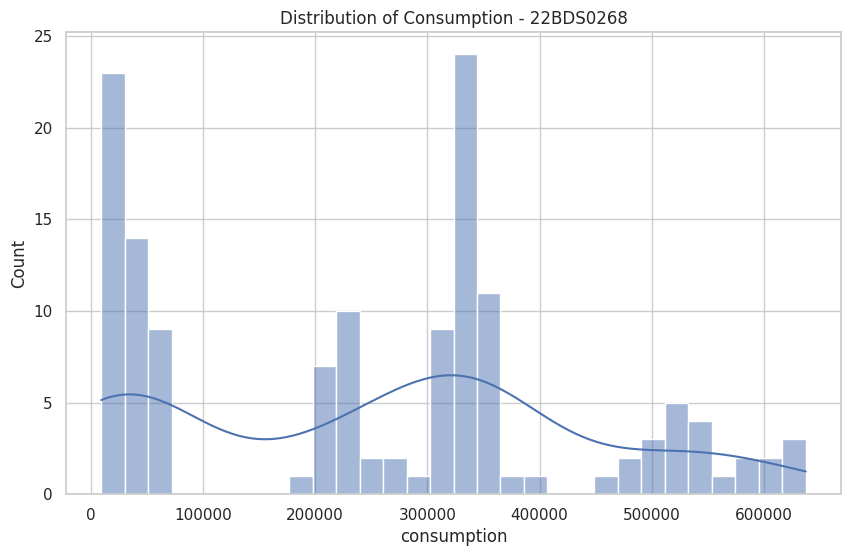

In [55]:
# 6. Univariate Analysis
sns.histplot(df['consumption'], kde=True, bins=30)
plt.title("Distribution of Consumption - 22BDS0268")
plt.show()

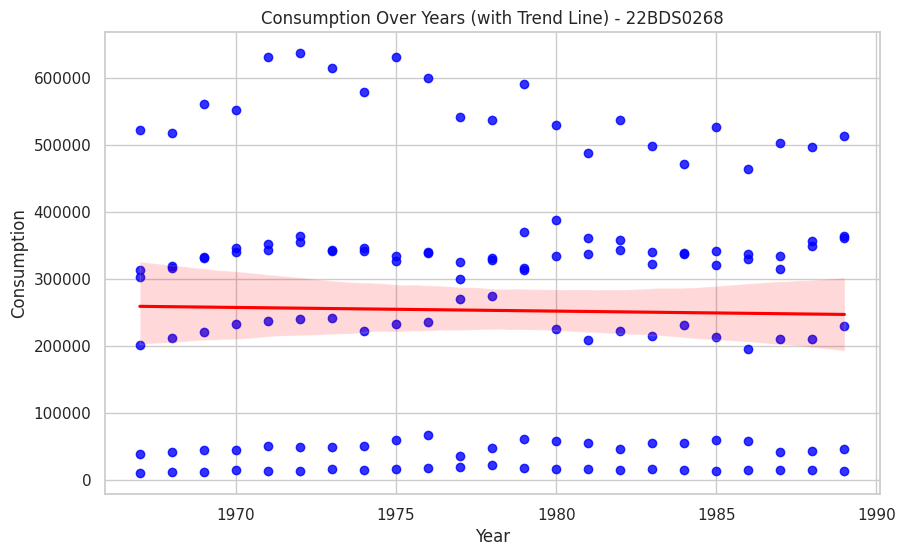

In [56]:
sns.regplot(x='year', y='consumption', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Consumption Over Years (with Trend Line) - 22BDS0268")
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.show()


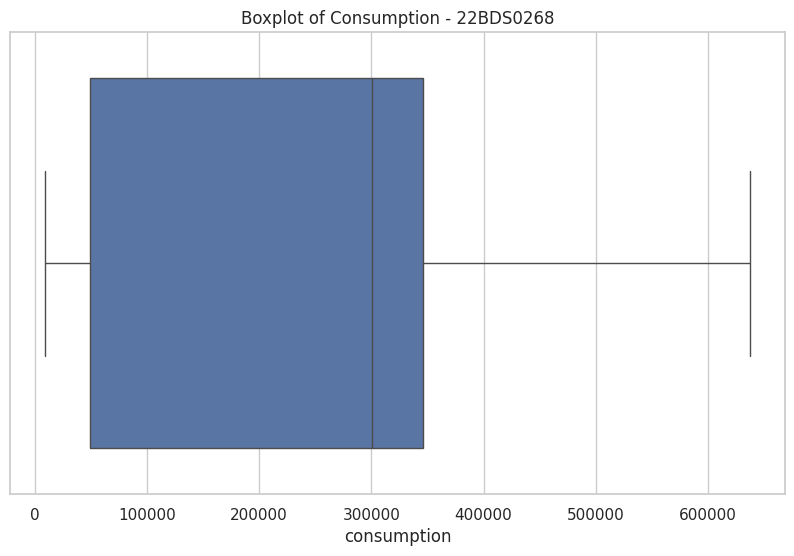

In [57]:
sns.boxplot(x=df['consumption'])
plt.title("Boxplot of Consumption - 22BDS0268")
plt.show()

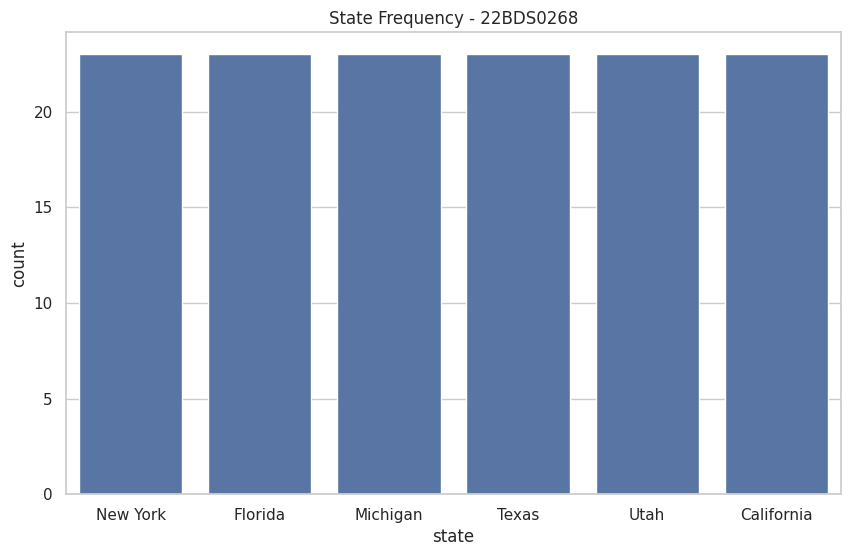

In [58]:
sns.countplot(x='state', data=df)
plt.title("State Frequency - 22BDS0268")
plt.show()

Correlation Table (Pearson method):
                 statecode          year  consumption     price    eprice  \
statecode    1.000000e+00 -8.712084e-15    -0.354773 -0.112909  0.017690   
year        -8.712084e-15  1.000000e+00    -0.019843  0.885261  0.905776   
consumption -3.547734e-01 -1.984306e-02     1.000000 -0.109541  0.045979   
price       -1.129095e-01  8.852612e-01    -0.109541  1.000000  0.935463   
eprice       1.768969e-02  9.057763e-01     0.045979  0.935463  1.000000   
oprice      -6.355616e-02  8.402169e-01     0.013371  0.856882  0.875059   
lprice      -1.124573e-01  8.793796e-01    -0.110035  0.985123  0.924900   
heating      4.617559e-01 -1.416930e-02     0.114430 -0.142188  0.080426   
income      -4.240753e-01  6.424389e-01     0.558559  0.658469  0.709568   

               oprice    lprice   heating    income  
statecode   -0.063556 -0.112457  0.461756 -0.424075  
year         0.840217  0.879380 -0.014169  0.642439  
consumption  0.013371 -0.110035  0.11443

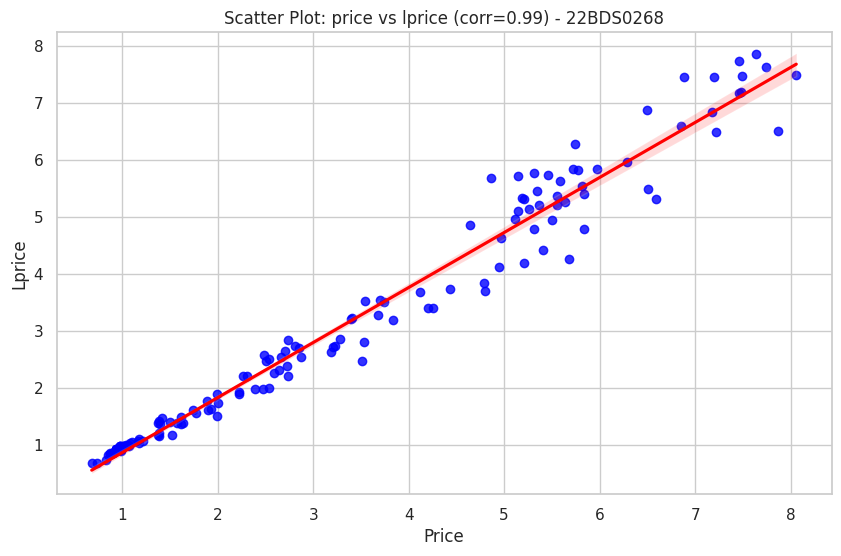

In [59]:
# 7. Bivariate Analysis
correlation = df.corr(numeric_only=True, method='pearson')
print("Correlation Table (Pearson method):\n", correlation)
corr_unstacked = correlation.unstack().sort_values(ascending=False)
highest_pair = corr_unstacked[(corr_unstacked < 1)].drop_duplicates().idxmax()
highest_value = corr_unstacked[(corr_unstacked < 1)].drop_duplicates().max()
print(f"Highest correlation is between {highest_pair[0]} and {highest_pair[1]}: {highest_value:.2f}")
var1, var2 = highest_pair
sns.regplot(x=var1, y=var2, data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f"Scatter Plot: {var1} vs {var2} (corr={highest_value:.2f}) - 22BDS0268")
plt.xlabel(var1.capitalize())
plt.ylabel(var2.capitalize())
plt.show()

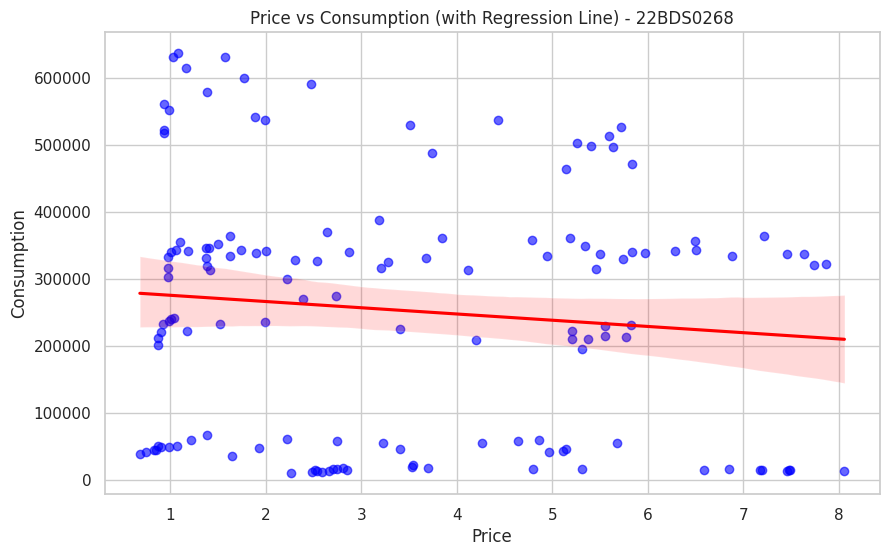

In [60]:
sns.regplot(x='price', y='consumption', data=df, scatter_kws={'color': 'blue', 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Price vs Consumption (with Regression Line) - 22BDS0268")
plt.xlabel("Price")
plt.ylabel("Consumption")
plt.show()


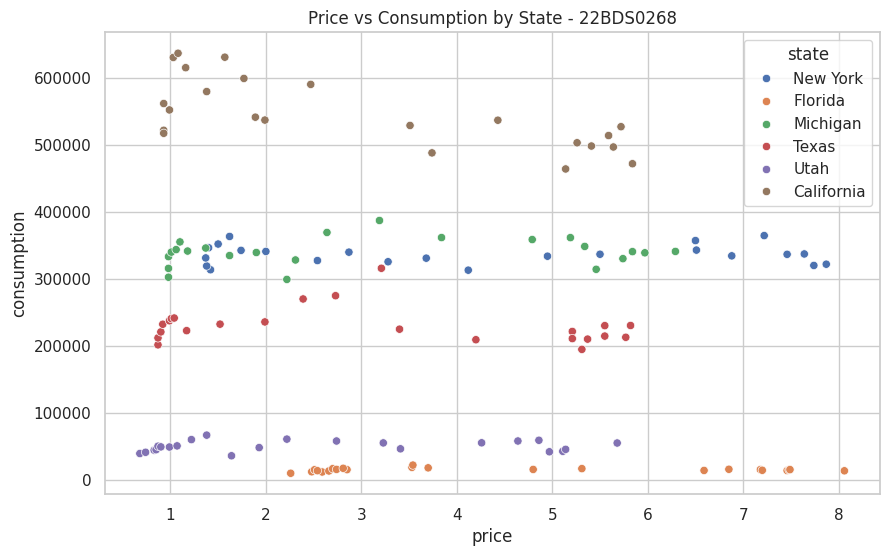

In [61]:
sns.scatterplot(x='price', y='consumption', hue='state', data=df)
plt.title("Price vs Consumption by State - 22BDS0268")
plt.show()

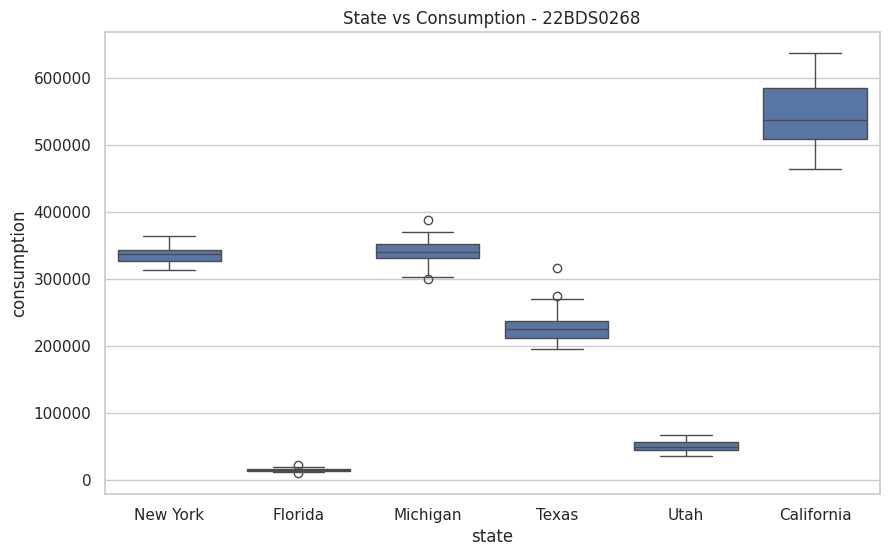

In [62]:
sns.boxplot(x='state', y='consumption', data=df)
plt.title("State vs Consumption - 22BDS0268")
plt.show()

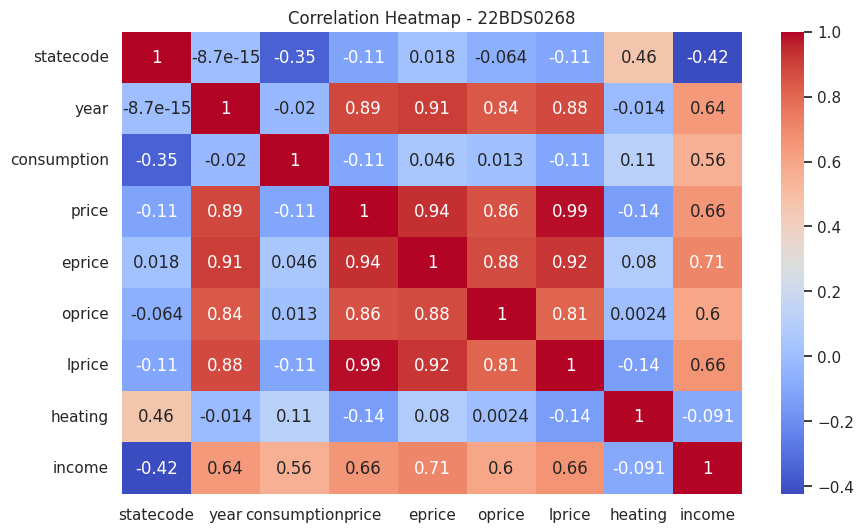

In [63]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - 22BDS0268")
plt.show()

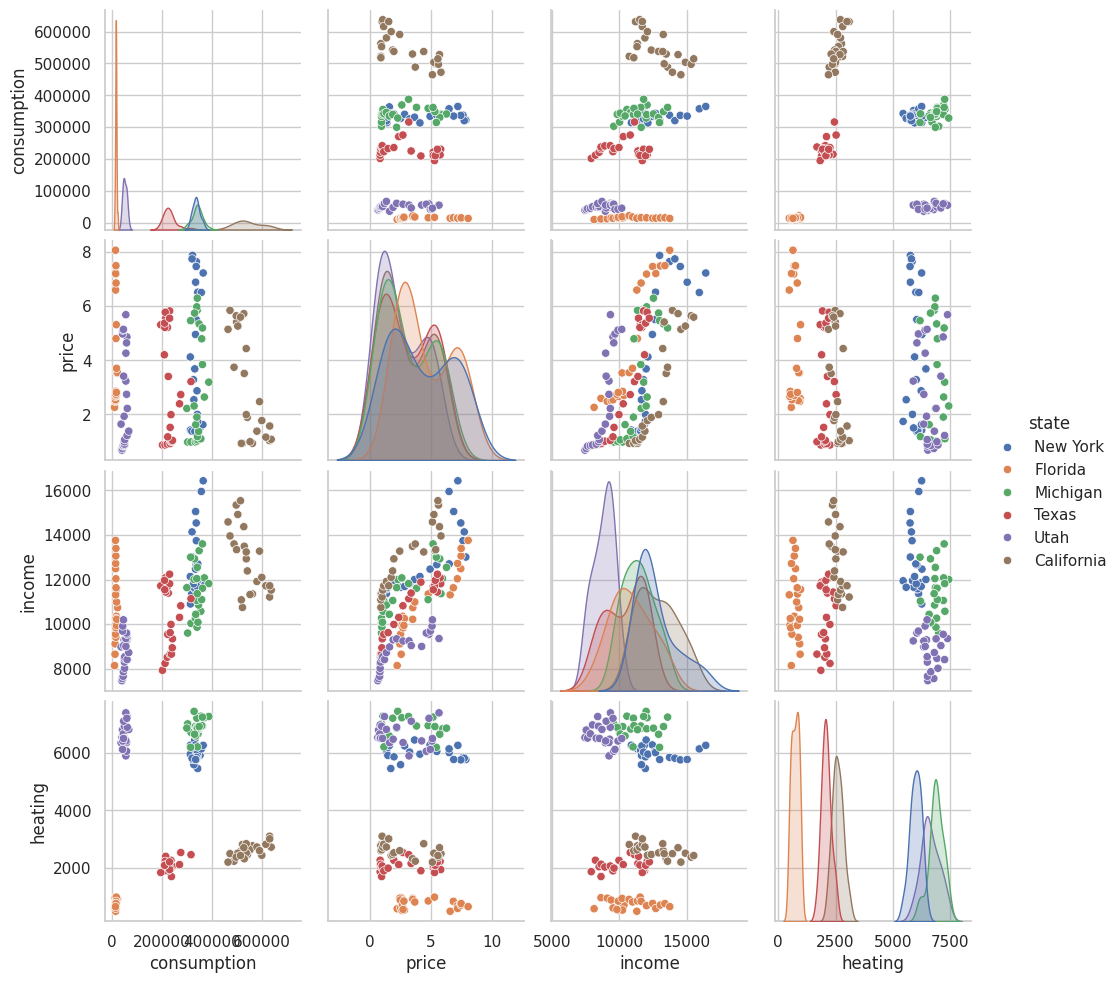

In [64]:
# 8. Multivariate Analysis
sns.pairplot(df, vars=['consumption', 'price', 'income', 'heating'], hue='state')
plt.show()

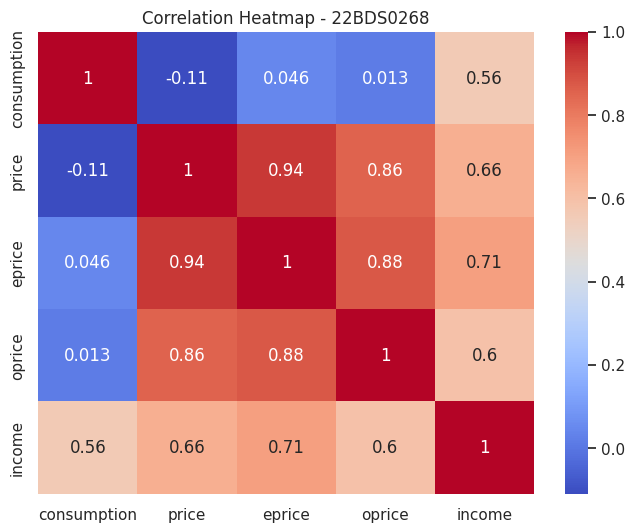

In [65]:
plt.figure(figsize=(8, 6))
corr_subset = df[['consumption', 'price', 'eprice', 'oprice', 'income']].corr()
sns.heatmap(corr_subset, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - 22BDS0268")
plt.show()

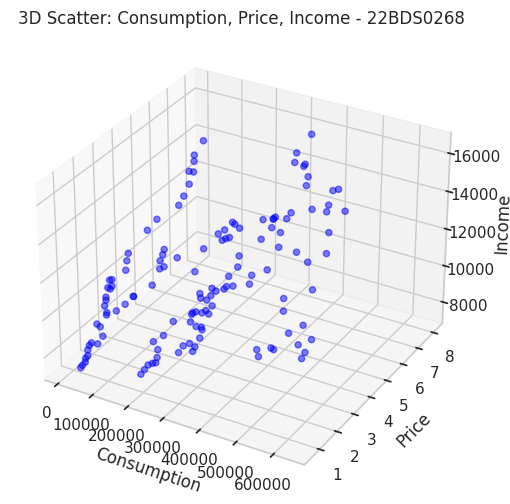

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['consumption'], df['price'], df['income'], c='blue', alpha=0.5)
ax.set_xlabel("Consumption")
ax.set_ylabel("Price")
ax.set_zlabel("Income")
plt.title("3D Scatter: Consumption, Price, Income - 22BDS0268")
plt.show()

# PHASE 2 EDA
# RAMIT KHETARPAL

In [67]:
# 1D analysis for numeric columns
num = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num)

# describe + skewness + quantiles
desc = df[num].describe().T
desc['skew'] = df[num].skew()
desc['q05'] = df[num].quantile(0.05)
desc['q25'] = df[num].quantile(0.25)
desc['q50'] = df[num].quantile(0.50)
desc['q75'] = df[num].quantile(0.75)
desc['q95'] = df[num].quantile(0.95)
display(desc)


Numeric columns: ['statecode', 'year', 'consumption', 'price', 'eprice', 'oprice', 'lprice', 'heating', 'income']


,count,mean,std,min,25%,50%,75%,max,skew,q05,q25,q50,q75,q95
statecode,138.0,27.000000,15.688110,5.00,10.0000,29.000,44.0000,45.00,-0.192716,5.0000,10.0000,29.000,44.0000,45.0000
year,138.0,1978.000000,6.657415,1967.00,1972.0000,1978.000,1984.0000,1989.00,0.000000,1968.0000,1972.0000,1978.000,1984.0000,1988.0000
consumption,138.0,252901.478261,184478.131559,9430.00,49103.5000,300835.500,346428.7500,637289.00,0.186896,13608.6500,49103.5000,300835.500,346428.7500,564809.3000
price,138.0,3.422319,2.169215,0.68,1.3800,2.775,5.3100,8.06,0.455734,0.8955,1.3800,2.775,5.3100,7.4600
eprice,138.0,5.053551,2.577859,1.98,2.4325,4.520,7.2825,10.86,0.459913,2.0870,2.4325,4.520,7.2825,9.9210
oprice,138.0,24.635580,15.401018,5.01,8.2400,19.865,40.1025,51.73,0.261992,6.6735,8.2400,19.865,40.1025,48.6655
lprice,138.0,3.207681,2.124937,0.68,1.2575,2.615,5.1925,7.87,0.591403,0.8700,1.2575,2.615,5.1925,7.2390
heating,138.0,4154.528986,2451.998462,481.00,2081.5000,4272.000,6498.0000,7440.00,-0.108642,635.1000,2081.5000,4272.000,6498.0000,7205.4000
income,138.0,11193.235652,1906.726093,7465.34,9637.1650,11367.460,12125.3350,16425.33,0.244102,8225.7870,9637.1650,11367.460,12125.3350,14541.6190



State frequency:
 state
New York      23
Florida       23
Michigan      23
Texas         23
Utah          23
California    23
Name: count, dtype: int64


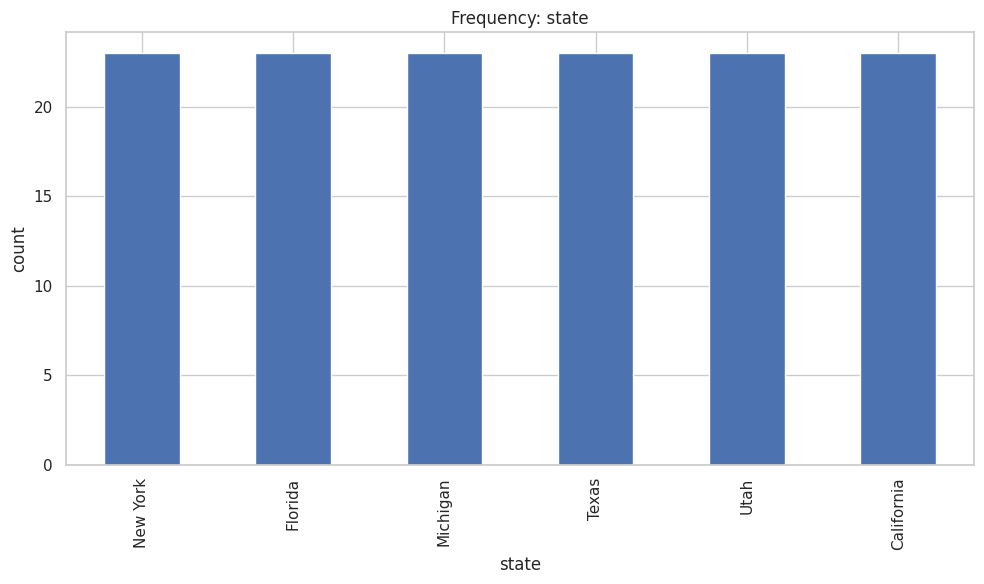

In [68]:

# Frequency distribution for a categorical column (state)
if 'state' in df.columns:
    freq = df['state'].value_counts()
    print("\nState frequency:\n", freq)
    freq.plot(kind='bar')
    plt.title("Frequency: state")
    plt.xlabel("state")
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()


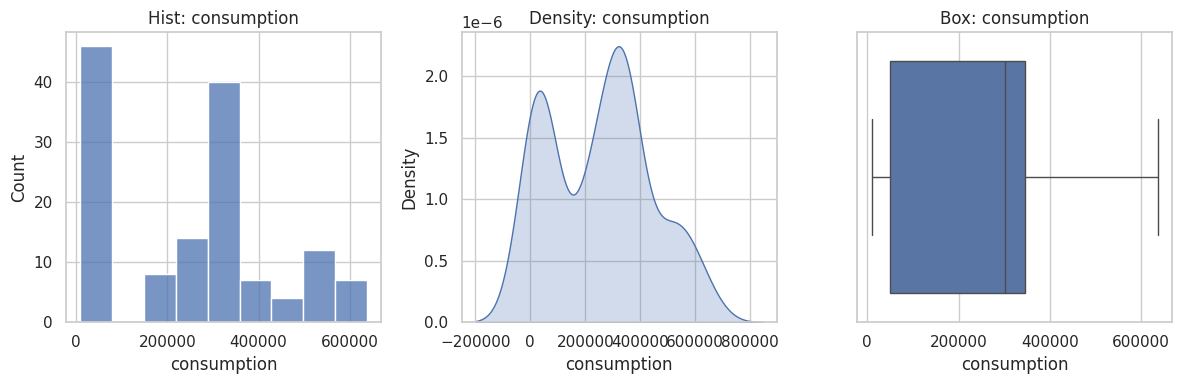

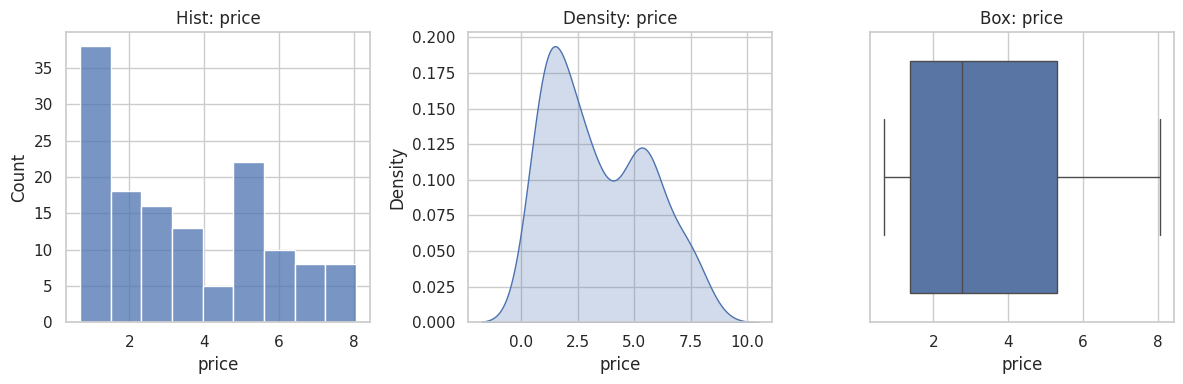

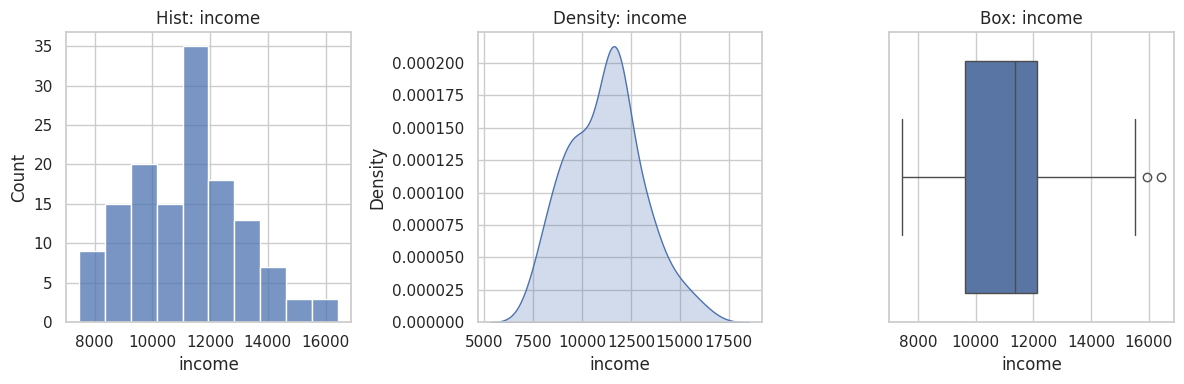

In [69]:

# Univariate plots: hist, density, box for key numeric vars
vars_to_plot = [c for c in ['consumption','price','income'] if c in df.columns]
for v in vars_to_plot:
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    sns.histplot(df[v].dropna(), kde=False)
    plt.title(f"Hist: {v}")
    plt.subplot(1,3,2)
    sns.kdeplot(df[v].dropna(), fill=True)
    plt.title(f"Density: {v}")
    plt.subplot(1,3,3)
    sns.boxplot(x=df[v].dropna())
    plt.title(f"Box: {v}")
    plt.tight_layout()
    plt.show()

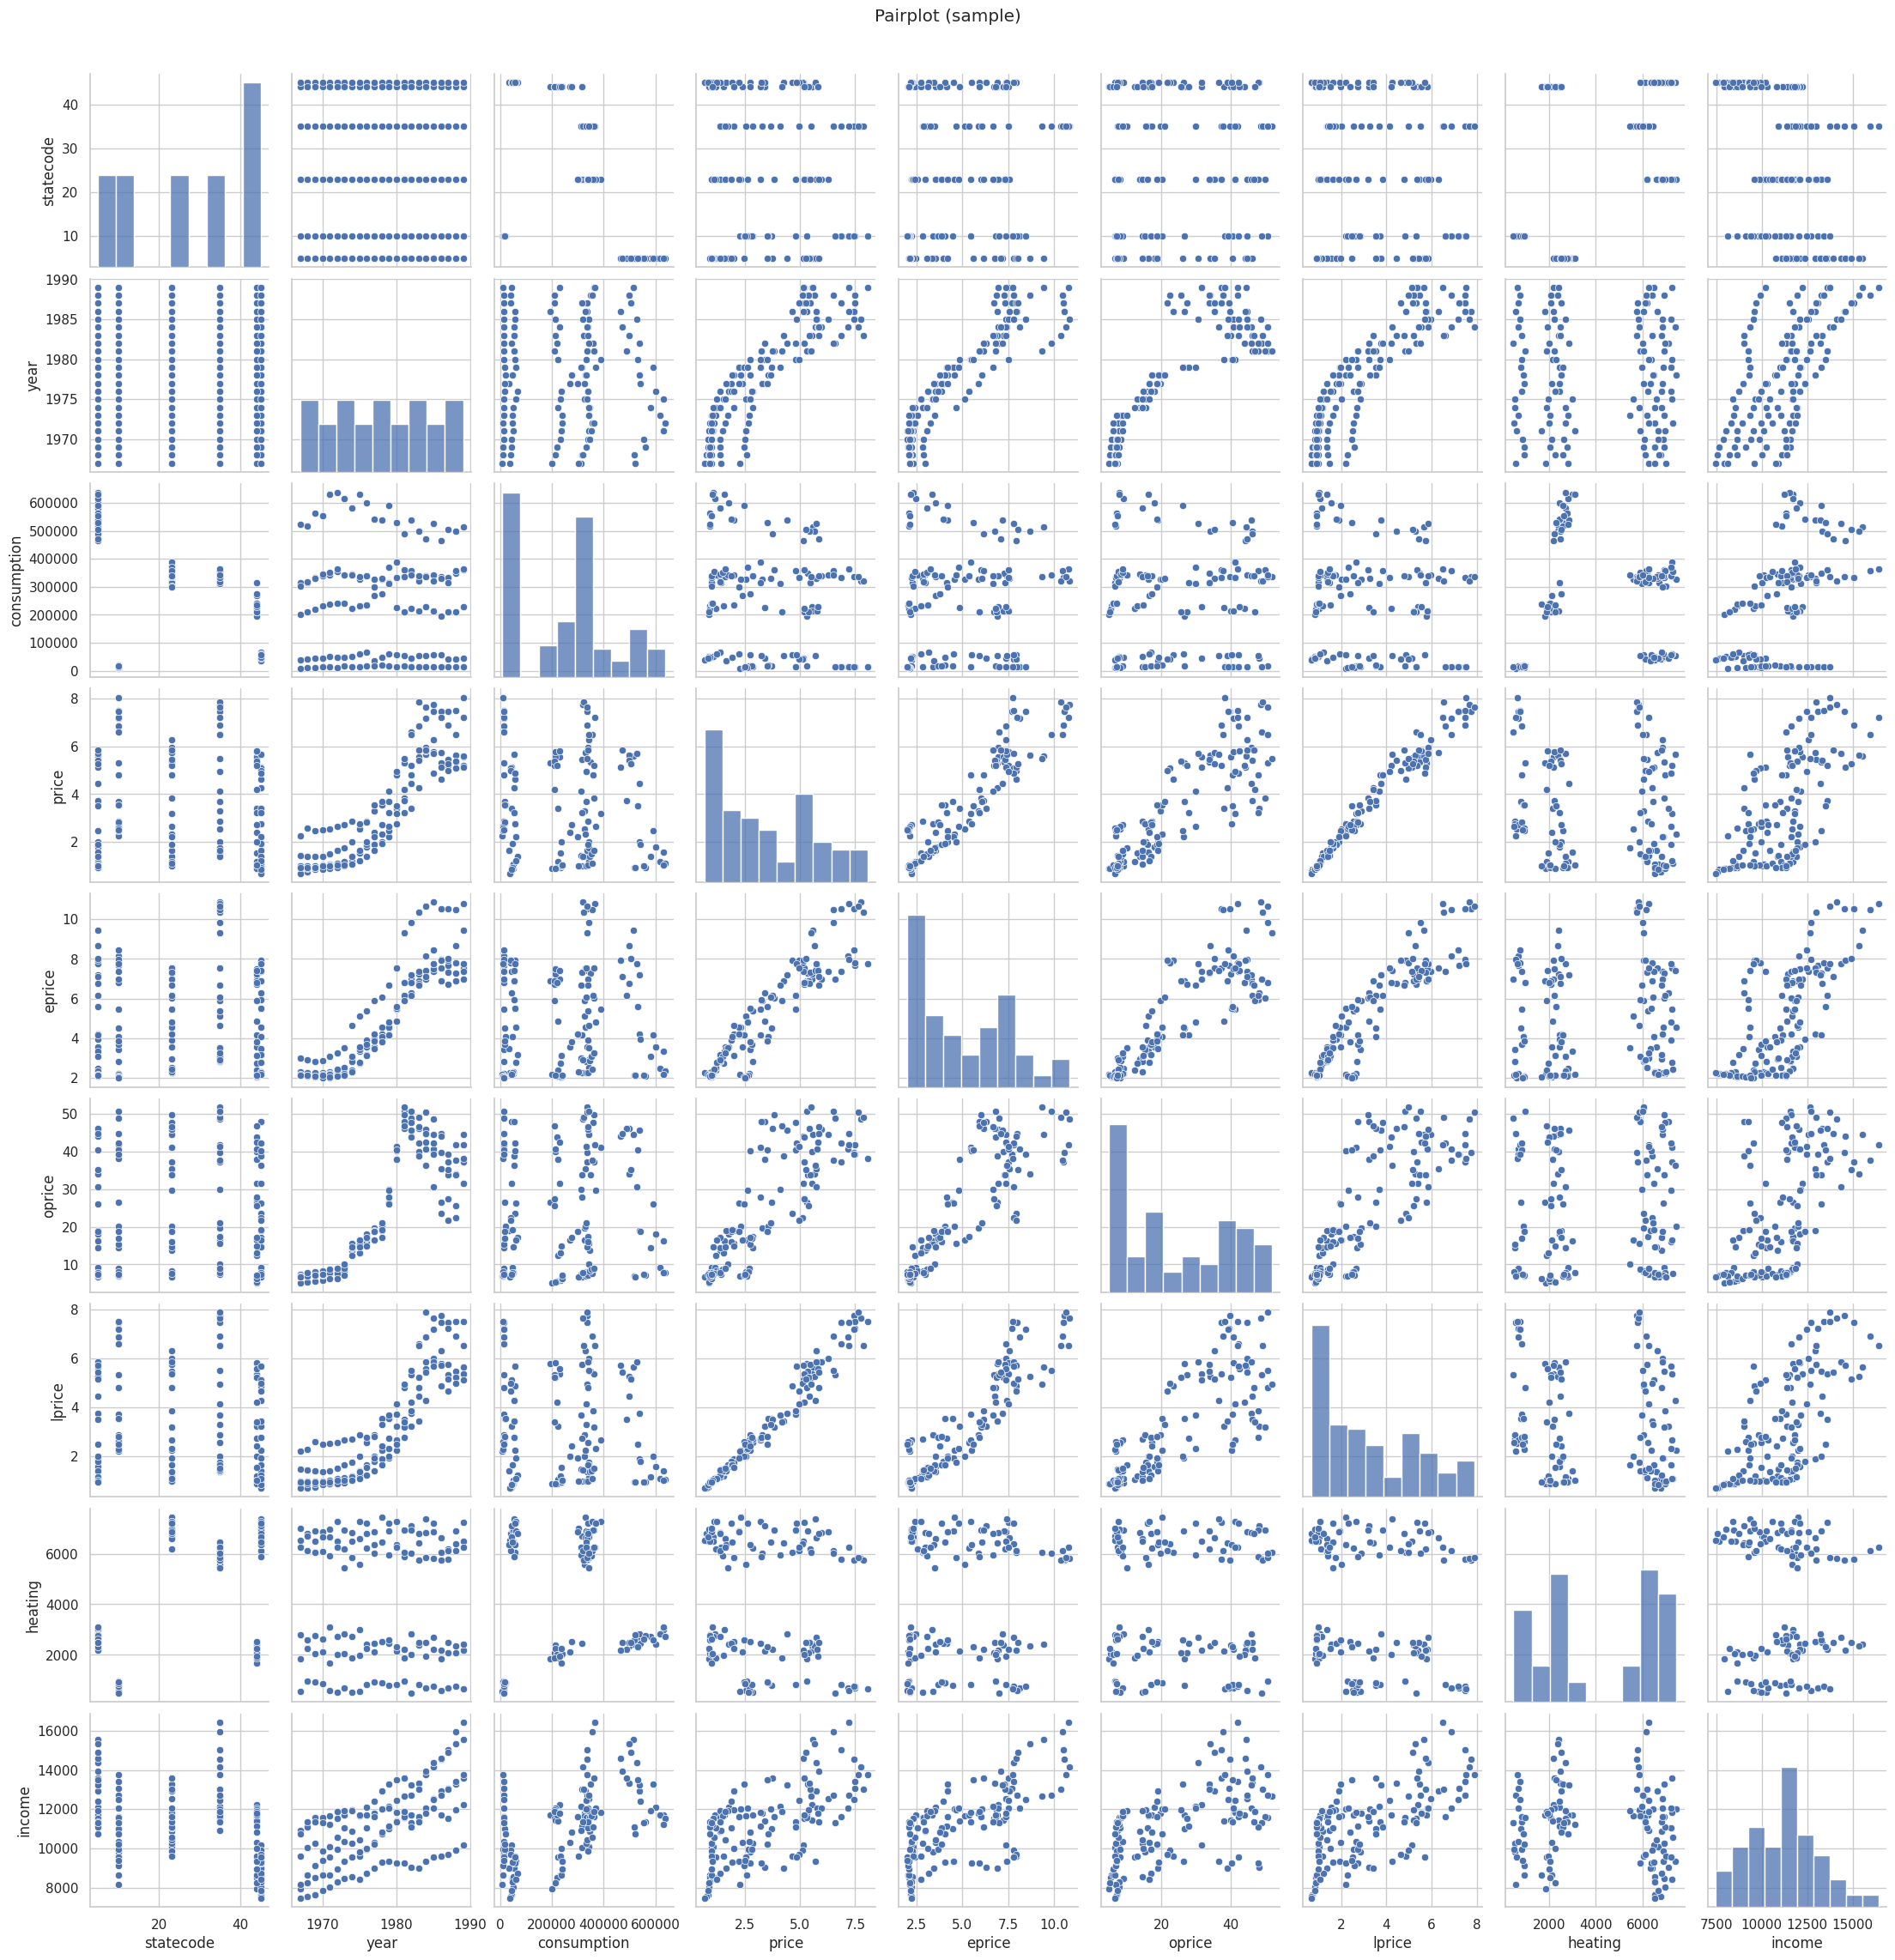

In [70]:
# 2D: numerical vs numerical — scatter + correlation heatmap
num2 = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num2) >= 2:
    sns.pairplot(df[num2].dropna().sample(min(500, len(df))))
    plt.suptitle("Pairplot (sample)", y=1.02)
    plt.show()



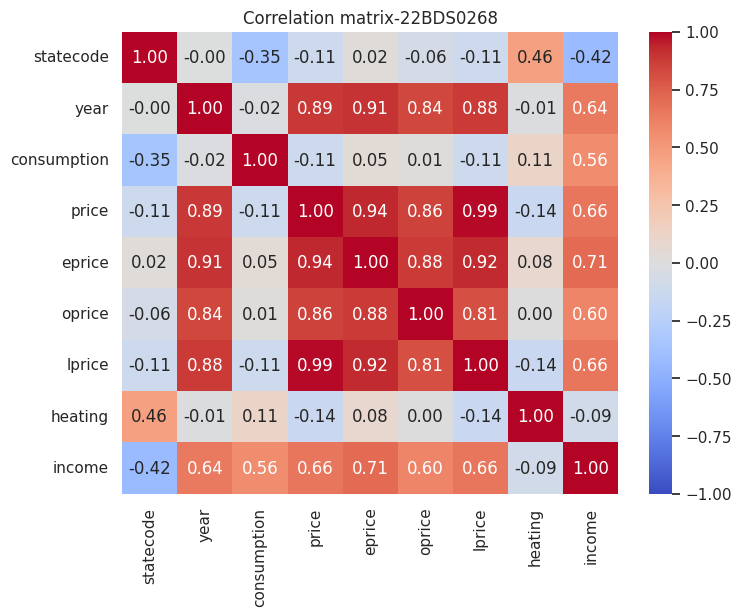

In [71]:
# correlation heatmap (numeric)
corr = df[num2].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix-22BDS0268")
plt.show()



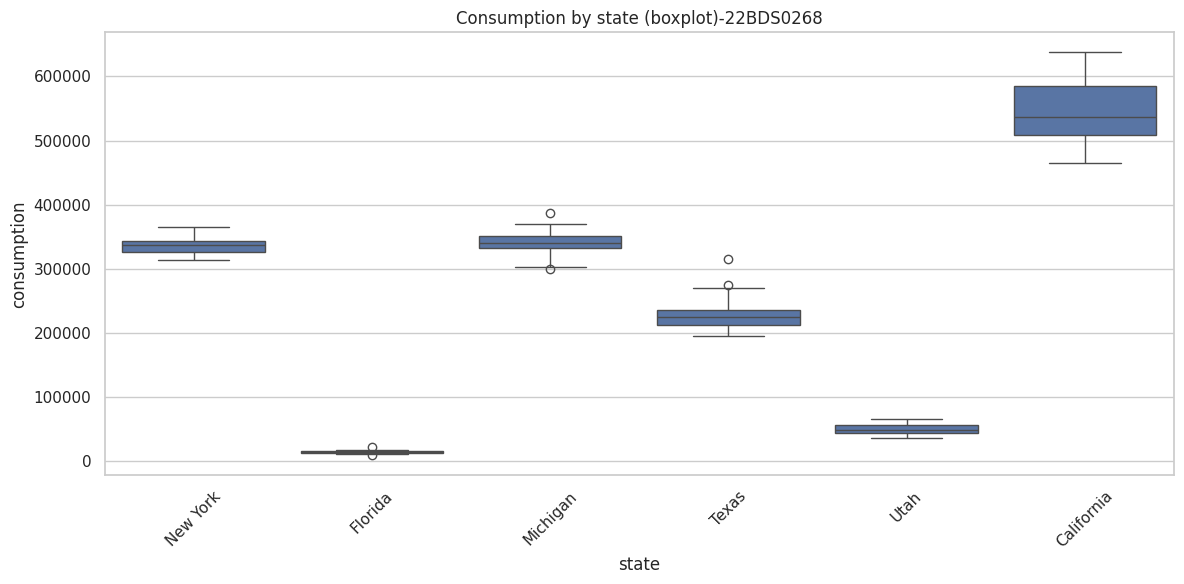

In [72]:
# numerical vs categorical: boxplots of numeric by state
if 'state' in df.columns and 'consumption' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='state', y='consumption', data=df)
    plt.title("Consumption by state (boxplot)-22BDS0268")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Contingency table sample:
 year        1967  1968  1969  1970  1971  1972  1973  1974  1975  1976
state                                                                 
California     1     1     1     1     1     1     1     1     1     1
Florida        1     1     1     1     1     1     1     1     1     1
Michigan       1     1     1     1     1     1     1     1     1     1
New York       1     1     1     1     1     1     1     1     1     1
Texas          1     1     1     1     1     1     1     1     1     1
Utah           1     1     1     1     1     1     1     1     1     1


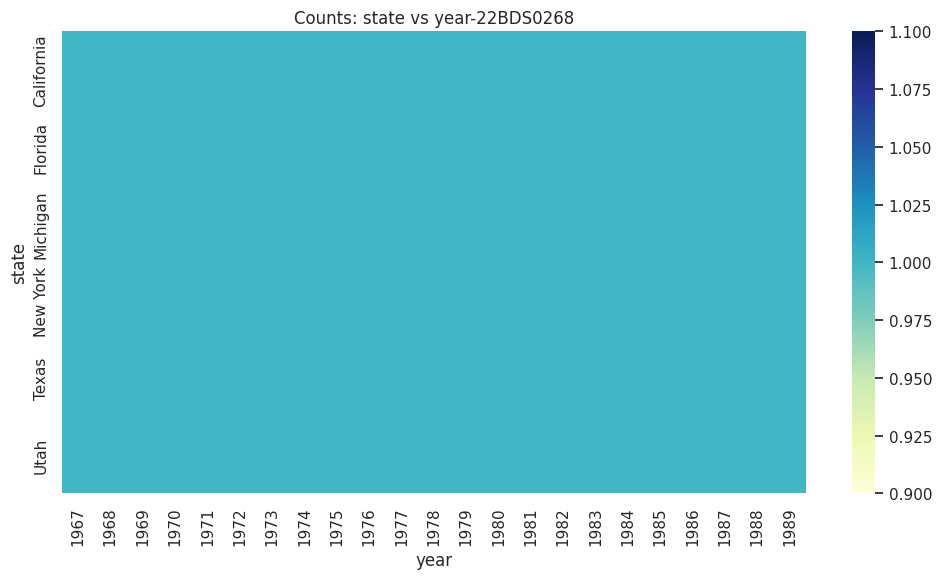

In [73]:
# categorical vs categorical: contingency and heatmap
if 'state' in df.columns and 'year' in df.columns:
    # example: count of records per state-year (may be sparse)
    ct = pd.crosstab(df['state'], df['year'])
    print("Contingency table sample:\n", ct.iloc[:10,:10])
    plt.figure(figsize=(12,6))
    sns.heatmap(ct, cmap='YlGnBu')
    plt.title("Counts: state vs year-22BDS0268")
    plt.show()


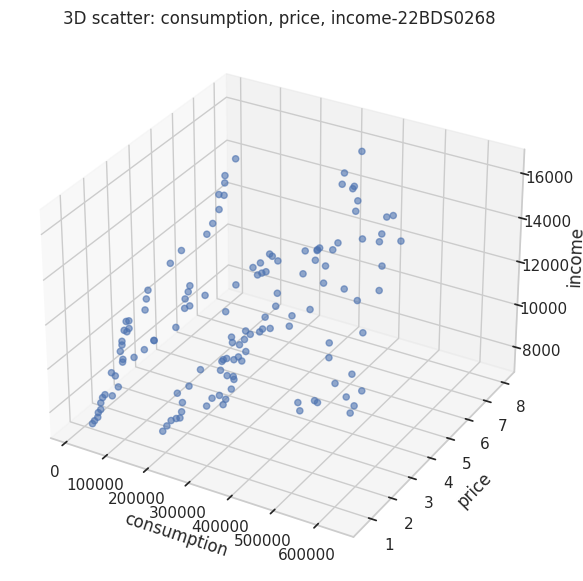

In [74]:
# 3D scatter (consumption, price, income) if present
if all(c in df.columns for c in ['consumption','price','income']):
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['consumption'], df['price'], df['income'], alpha=0.6)
    ax.set_xlabel('consumption')
    ax.set_ylabel('price')
    ax.set_zlabel('income')
    plt.title("3D scatter: consumption, price, income-22BDS0268")
    plt.show()
else:
    print("Skipping 3D scatter: required cols not present.")



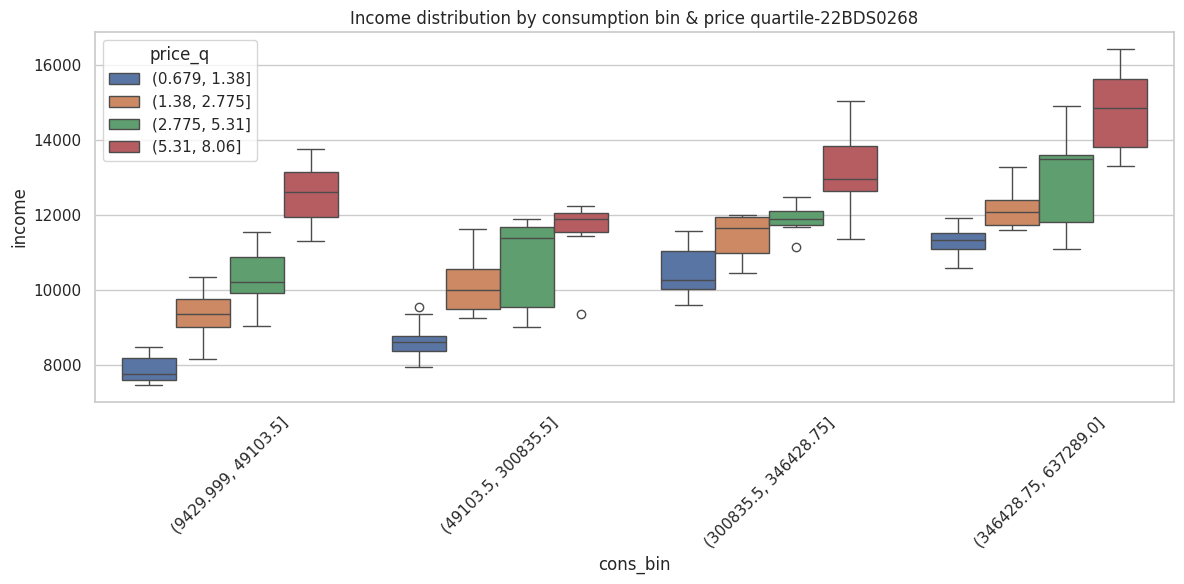

In [75]:

# 3D-style box analysis: show distribution of third var across bins of first two via pivot & boxplot
if 'consumption' in df.columns and 'price' in df.columns and 'income' in df.columns:
    # bin consumption into 4 groups and show income boxplot by price quartile
    df['cons_bin'] = pd.qcut(df['consumption'].dropna(), q=4, duplicates='drop')
    df['price_q'] = pd.qcut(df['price'].dropna(), q=4, duplicates='drop')
    plt.figure(figsize=(12,6))
    sns.boxplot(x='cons_bin', y='income', hue='price_q', data=df)
    plt.title("Income distribution by consumption bin & price quartile-22BDS0268")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

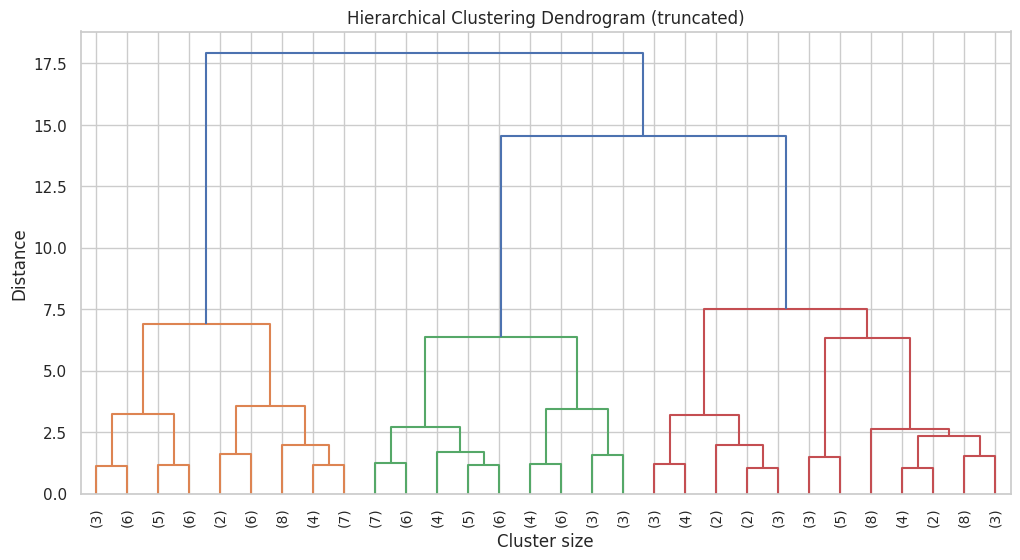

Hierarchical cluster counts:
 h_cluster
2    47
0    47
1    44
Name: count, dtype: int64


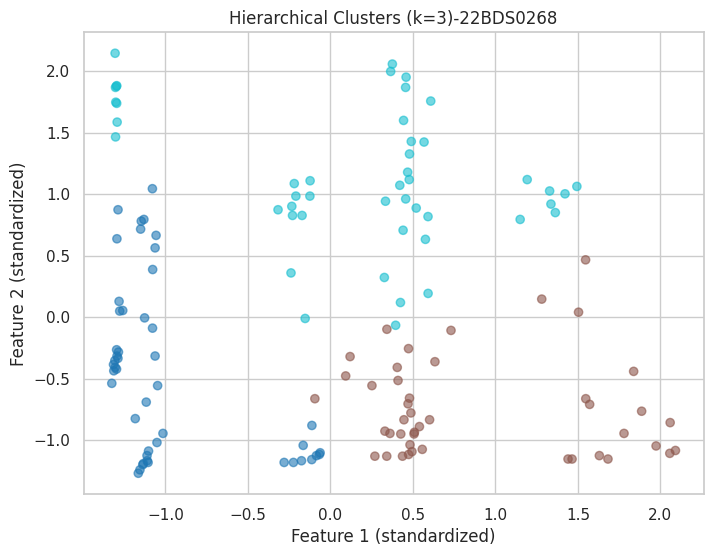

In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Use same numeric columns as before
cl_cols = ['consumption','price','income']
cl_df = df[cl_cols].dropna().copy()

# Standardize
sc = StandardScaler()
X = sc.fit_transform(cl_df)

# --- Hierarchical clustering linkage matrix ---
Z = linkage(X, method='ward')  # can change to 'complete', 'average', etc.

# --- Plot dendrogram (truncated for readability) ---
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=True, leaf_rotation=90.)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

# --- Cut tree to get cluster labels ---
k_h = 3  # choose number of clusters based on dendrogram
labels_h = fcluster(Z, k_h, criterion='maxclust') - 1  # zero-based labels
cl_df['h_cluster'] = labels_h
print("Hierarchical cluster counts:\n", cl_df['h_cluster'].value_counts())

# --- Visualize clusters in 2D (first 2 features) ---
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels_h, cmap='tab10', alpha=0.6)
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title(f"Hierarchical Clusters (k={k_h})-22BDS0268")
plt.show()


# PHASE 3


Dataset Head:
   rownames state  statecode  year  consumption  price  eprice  oprice  \
0         1    NY         35  1967       313656   1.42    2.98    7.40   
1         2    NY         35  1968       319282   1.38    2.91    7.77   
2         3    NY         35  1969       331326   1.37    2.84    7.96   
3         4    NY         35  1970       346533   1.40    2.87    8.33   
4         5    NY         35  1971       352085   1.50    3.07    8.80   

   lprice  heating    income  
0    1.47     6262  10903.75  
1    1.42     6125  11370.02  
2    1.38     6040  11578.68  
3    1.37     6085  11586.77  
4    1.40     5907  11657.42  

Explained Variance Ratio:
[0.60585646 0.19708559]


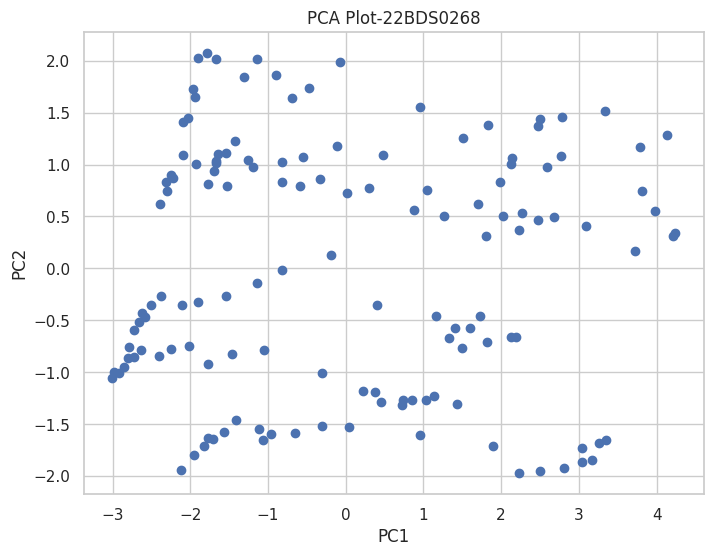


=== MULTIPLE LINEAR REGRESSION ===
MSE: 10937764228.720768
R² Score: 0.5674574131693149
MAE: 90449.83750986693
MAPE: 248.76410633044134
Coefficients: [-76438.52547969    111.15036136]
Intercept: -730707.7455477027


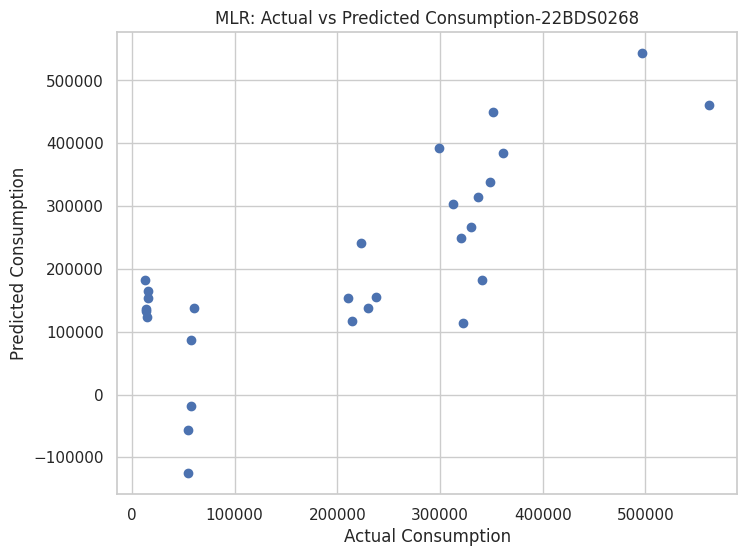

In [77]:
# =============================
#  IMPORT LIBRARIES
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# =============================
#  LOAD DATA
# =============================
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/NaturalGas.csv"
df = pd.read_csv(url)

print("\nDataset Head:")
print(df.head())

# =============================
#  PCA — Dimensionality Reduction
# =============================
num_cols = ["consumption","price","eprice","oprice","lprice","heating","income"]

# Scale data
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])

# PCA (2 components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

df["PC1"] = pca_components[:,0]
df["PC2"] = pca_components[:,1]

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# PCA Plot
plt.figure(figsize=(8,6))
plt.scatter(df["PC1"], df["PC2"])
plt.title("PCA Plot-22BDS0268")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# =============================
#  MULTIPLE LINEAR REGRESSION (Without PCA)
# =============================
X = df[["price","income"]]   # features
y = df["consumption"]        # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Adjusted R²
n = len(y_test)
k = X.shape[1]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - k - 1))

print("\n=== MULTIPLE LINEAR REGRESSION ===")
print("MSE:", mse)
print("R² Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# =============================
#  MLR — Predicted vs Actual Plot
# =============================

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("MLR: Actual vs Predicted Consumption-22BDS0268")
plt.show()


